D:\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


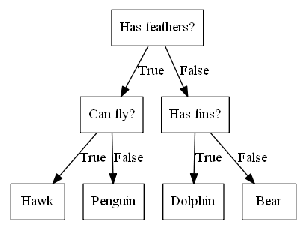

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import sys; sys.path.append('../')
import mglearn

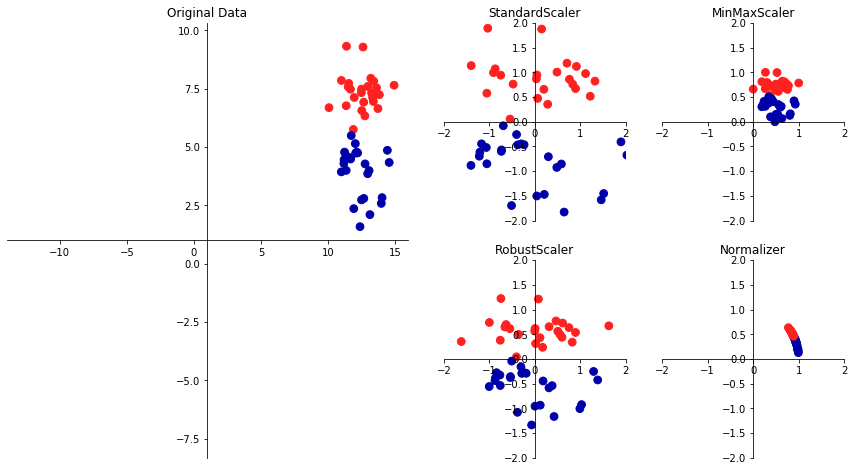

In [2]:
mglearn.plots.plot_scaling()

In [3]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [4]:
cancer = load_breast_cancer()

X_train,X_test,y_train,y_test = train_test_split(cancer.data,cancer.target,random_state=1)
print(X_train.shape)
print(X_test.shape)

(426, 30)
(143, 30)


In [5]:
from sklearn.preprocessing import MinMaxScaler

In [6]:
scaler = MinMaxScaler()

In [7]:
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [8]:
#变换数据
X_train_scaled = scaler.transform(X_train)
#在缩放之前和之后分别打印数据集属性
print(X_train_scaled.shape)
print(X_train.min(axis=0))
print(X_train.max(axis=0))
print(X_train_scaled.min(axis=0))
print(X_train_scaled.max(axis=0))

(426, 30)
[6.981e+00 9.710e+00 4.379e+01 1.435e+02 5.263e-02 1.938e-02 0.000e+00
 0.000e+00 1.060e-01 5.024e-02 1.153e-01 3.602e-01 7.570e-01 6.802e+00
 1.713e-03 2.252e-03 0.000e+00 0.000e+00 9.539e-03 8.948e-04 7.930e+00
 1.202e+01 5.041e+01 1.852e+02 7.117e-02 2.729e-02 0.000e+00 0.000e+00
 1.566e-01 5.521e-02]
[2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 2.867e-01 4.268e-01
 2.012e-01 3.040e-01 9.575e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 6.146e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 9.379e-01 1.170e+00 2.910e-01
 5.774e-01 1.486e-01]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [9]:
X_test_scaled = scaler.transform(X_test)
print(X_test_scaled.min(axis=0))
print(X_test_scaled.max(axis=0))

[ 0.0336031   0.0226581   0.03144219  0.01141039  0.14128374  0.04406704
  0.          0.          0.1540404  -0.00615249 -0.00137796  0.00594501
  0.00430665  0.00079567  0.03919502  0.0112206   0.          0.
 -0.03191387  0.00664013  0.02660975  0.05810235  0.02031974  0.00943767
  0.1094235   0.02637792  0.          0.         -0.00023764 -0.00182032]
[0.9578778  0.81501522 0.95577362 0.89353128 0.81132075 1.21958701
 0.87956888 0.9333996  0.93232323 1.0371347  0.42669616 0.49765736
 0.44117231 0.28371044 0.48703131 0.73863671 0.76717172 0.62928585
 1.33685792 0.39057253 0.89612238 0.79317697 0.84859804 0.74488793
 0.9154725  1.13188961 1.07008547 0.92371134 1.20532319 1.63068851]


In [10]:
from sklearn.datasets import make_blobs

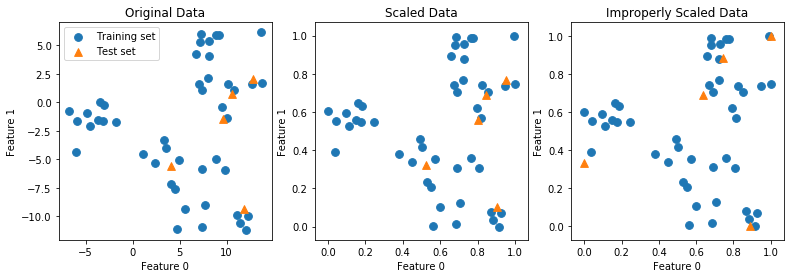

In [11]:
#构造数据
X,_ = make_blobs(n_samples=50,centers=5,random_state=4,cluster_std=2)
#划分数据
X_train,X_test = train_test_split(X,random_state=5,test_size=.1)

#绘制训练集和测试集
fig,axes = plt.subplots(1,3,figsize=(13,4))
axes[0].scatter(X_train[:,0],X_train[:,1],cmap=mglearn.cm2(0),label="Training set",s=60)
axes[0].scatter(X_test[:,0],X_test[:,1],cmap=mglearn.cm2(1),marker='^',label="Test set",s=60)
axes[0].legend(loc='upper left')
axes[0].set_title("Original Data")

#利用MinMaxScaler缩放数据
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

#将正确缩放的数据可视化
axes[1].scatter(X_train_scaled[:,0],X_train_scaled[:,1],cmap=mglearn.cm2(0),label="Training set",s=60)
axes[1].scatter(X_test_scaled[:,0],X_test_scaled[:,1],cmap=mglearn.cm2(1),marker='^',label="Test set",s=60)
axes[1].set_title("Scaled Data")

#单独对测试集进行缩放，使其值在0到1之间，只为举例
test_scaler = MinMaxScaler()
test_scaler.fit(X_test)
X_test_scaled_badly = test_scaler.transform(X_test)

#将错误数据可视化
axes[2].scatter(X_train_scaled[:,0],X_train_scaled[:,1],cmap=mglearn.cm2(0),label="Training set",s=60)
axes[2].scatter(X_test_scaled_badly[:,0],X_test_scaled_badly[:,1],cmap=mglearn.cm2(1),marker='^',label="Test set",s=60)
axes[2].set_title("Improperly Scaled Data")

for ax in axes:
    ax.set_xlabel("Feature 0")
    ax.set_ylabel('Feature 1')

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
scaler = StandardScaler()
X_scaled = scaler.fit(X).transform(X)
X_scaled = scaler.fit_transform(X)

In [14]:
from sklearn.svm import SVC

In [15]:
X_train,X_test,y_train,y_test = train_test_split(cancer.data,cancer.target,random_state=0)

svm = SVC(C=100)
svm.fit(X_train,y_train)
print(svm.score(X_test,y_test))

0.6293706293706294


D:\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [16]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
svm.fit(X_train_scaled,y_train)
print(svm.score(X_test_scaled,y_test))

0.965034965034965


D:\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
svm.fit(X_train_scaled,y_train)
print(svm.score(X_test_scaled,y_test))

0.958041958041958


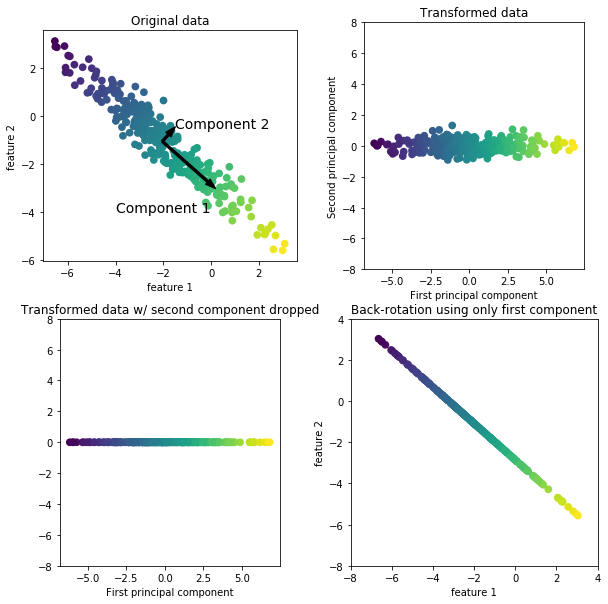

In [19]:
mglearn.plots.plot_pca_illustration()

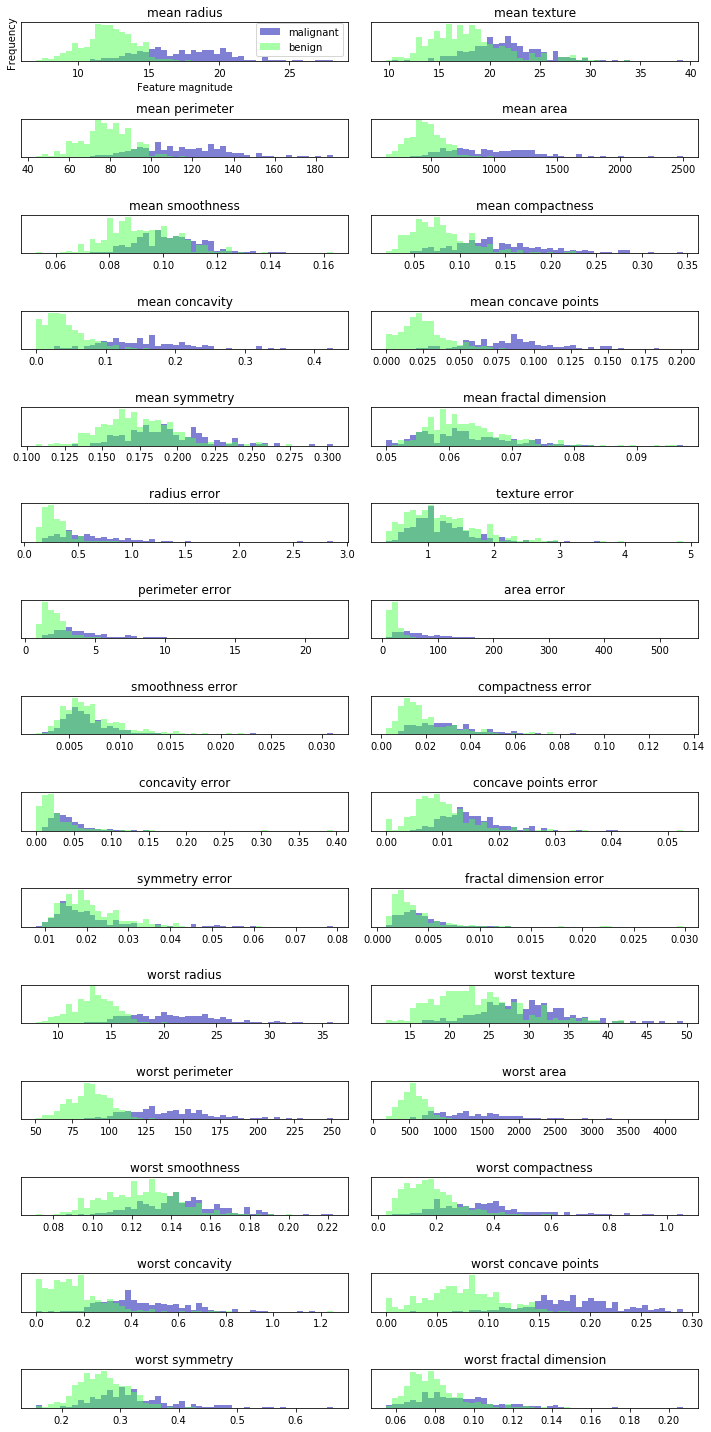

In [20]:
fig,axes = plt.subplots(15,2,figsize=(10,20))
malignant = cancer.data[cancer.target == 0]
benign = cancer.data[cancer.target == 1]

ax = axes.ravel()

for i in range(30):
    _,bins = np.histogram(cancer.data[:,i],bins=50)
    ax[i].hist(malignant[:,i],bins=bins,color=mglearn.cm3(0),alpha=.5)
    ax[i].hist(benign[:,i],bins=bins,color=mglearn.cm3(2),alpha=.5)    
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())
    
ax[0].set_xlabel("Feature magnitude")
ax[0].set_ylabel("Frequency")
ax[0].legend(["malignant","benign"],loc="best")
fig.tight_layout()

In [21]:
cancer = load_breast_cancer()

scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

In [22]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X_scaled)

X_pca = pca.transform(X_scaled)
print(X_scaled.shape)
print(X_pca.shape)

(569, 30)
(569, 2)


Text(0, 0.5, 'Second principal component')

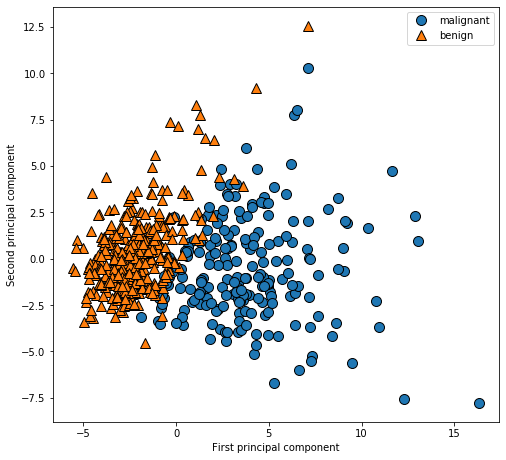

In [23]:
#对前两个主成分作图，按类别着色
plt.figure(figsize=(8,8))
mglearn.discrete_scatter(X_pca[:,0],X_pca[:,1],cancer.target)
plt.legend(cancer.target_names,loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

In [24]:
print(pca.components_.shape)

(2, 30)


In [25]:
print(pca.components_)

[[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]


Text(0, 0.5, 'Principal components')

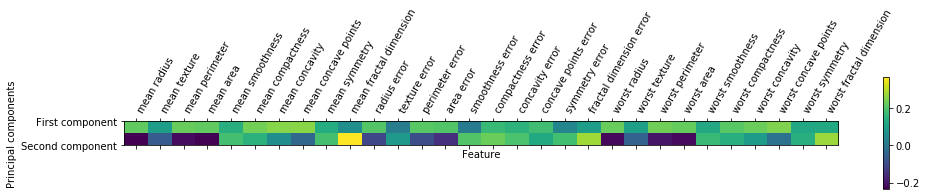

In [26]:
plt.matshow(pca.components_,cmap='viridis')
plt.yticks([0,1],["First component","Second component"])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)),
          cancer.feature_names,rotation=60,ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal components")

In [27]:
from sklearn.datasets import fetch_lfw_people

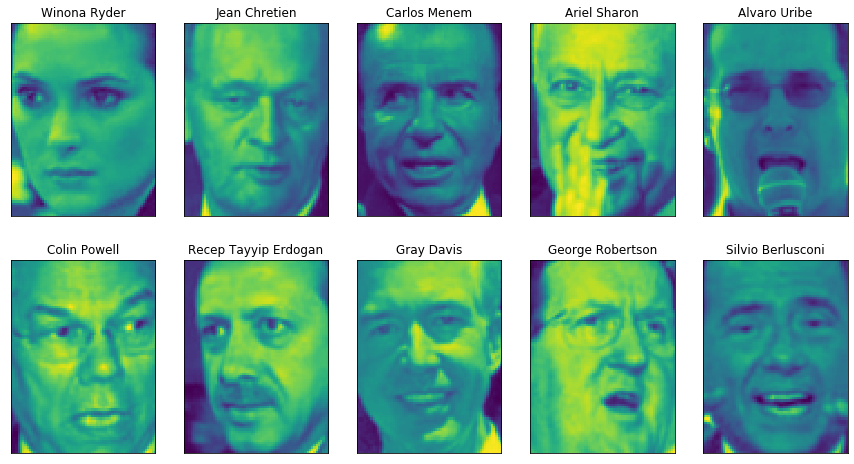

In [28]:
people = fetch_lfw_people(min_faces_per_person=20,resize=.7)
image_shape = people.images[0].shape
fix,axes = plt.subplots(2,5,figsize=(15,8),subplot_kw={'xticks':(),'yticks':()})
for target,image,ax in zip(people.target,people.images,axes.ravel()):
    ax.imshow(image)
    ax.set_title(people.target_names[target])

In [29]:
print(people.images.shape)
print(len(people.target_names))

(3023, 87, 65)
62


In [30]:
#计算每个目标出现的次数
counts = np.bincount(people.target)
#将次数与目标名称一起打印出来
for i ,(count,name) in enumerate(zip(counts,people.target_names)):
    print("{0:25}{1:3}".format(name,count),end='    ')
    if(i+1) % 3 == 0:
        print()

Alejandro Toledo          39    Alvaro Uribe              35    Amelie Mauresmo           21    
Andre Agassi              36    Angelina Jolie            20    Ariel Sharon              77    
Arnold Schwarzenegger     42    Atal Bihari Vajpayee      24    Bill Clinton              29    
Carlos Menem              21    Colin Powell             236    David Beckham             31    
Donald Rumsfeld          121    George Robertson          22    George W Bush            530    
Gerhard Schroeder        109    Gloria Macapagal Arroyo   44    Gray Davis                26    
Guillermo Coria           30    Hamid Karzai              22    Hans Blix                 39    
Hugo Chavez               71    Igor Ivanov               20    Jack Straw                28    
Jacques Chirac            52    Jean Chretien             55    Jennifer Aniston          21    
Jennifer Capriati         42    Jennifer Lopez            21    Jeremy Greenstock         24    
Jiang Zemin               20  

In [31]:
mask = np.zeros(people.target.shape,dtype=np.bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1
    
X_people = people.data[mask]
y_people = people.target[mask]

X_people = X_people / 255

In [32]:
from sklearn.neighbors import KNeighborsClassifier

In [33]:
X_train,X_test,y_train,y_test = train_test_split(X_people,y_people,stratify=y_people,random_state=0)
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
print(knn.score(X_test,y_test))

0.23255813953488372


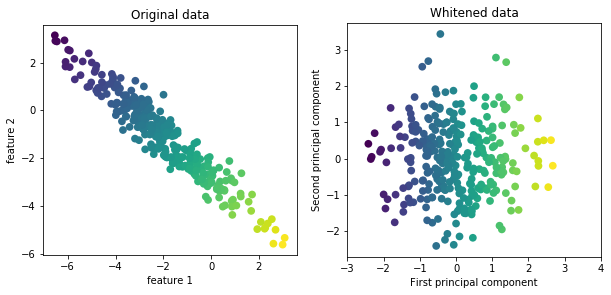

In [34]:
mglearn.plots.plot_pca_whitening()

In [35]:
pca = PCA(n_components=100,whiten=True,random_state=0).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print(X_train_pca.shape)

(1547, 100)


In [36]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_pca,y_train)
print(knn.score(X_test_pca,y_test))

0.312015503875969


In [37]:
print(pca.components_.shape)

(100, 5655)


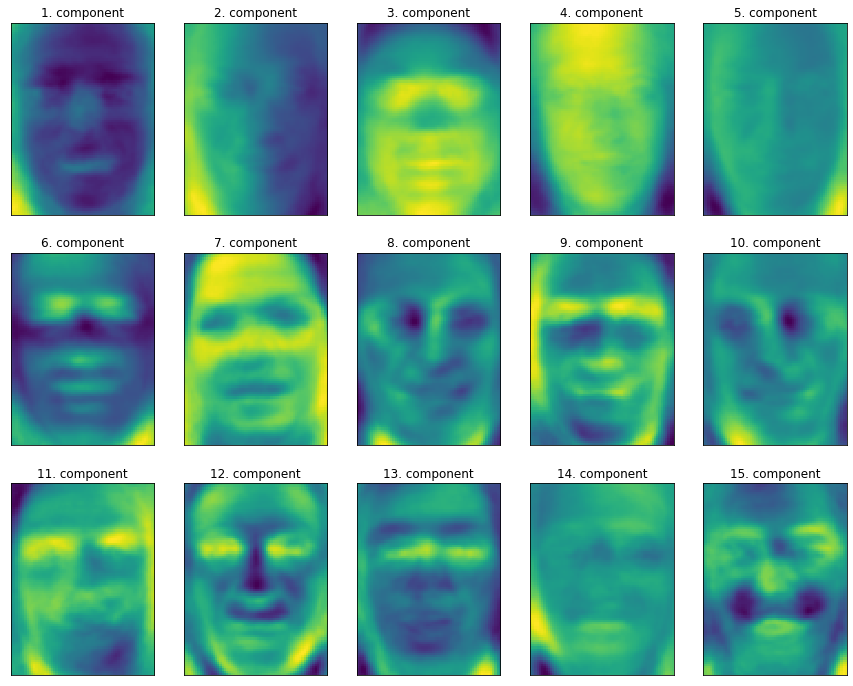

In [38]:
fix,axes = plt.subplots(3,5,figsize=(15,12),subplot_kw={'xticks':(),'yticks':()})
for i,(component,ax) in enumerate(zip(pca.components_,axes.ravel())):
    ax.imshow(component.reshape(image_shape),cmap='viridis')
    ax.set_title("{}. component".format((i+1)))

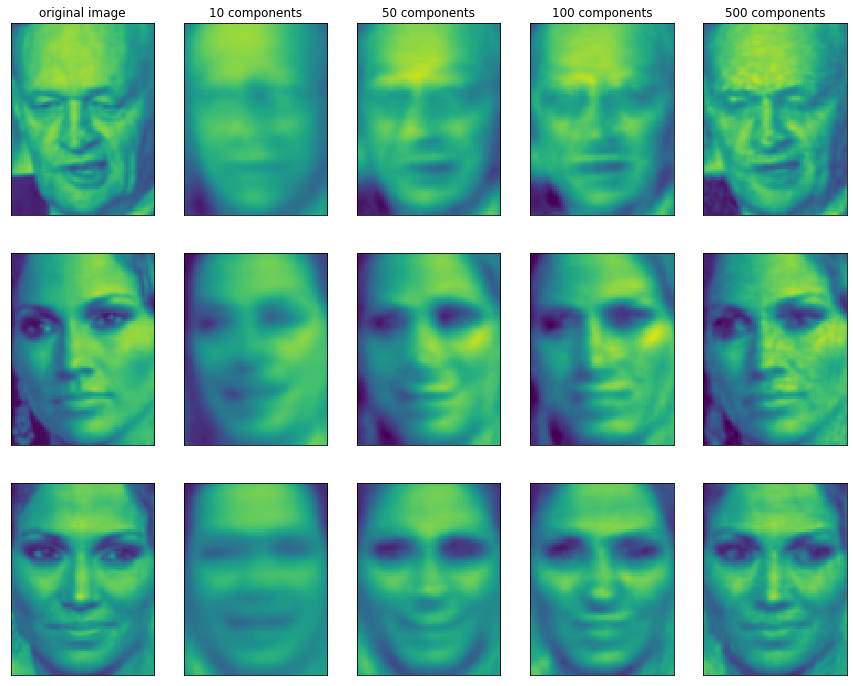

In [39]:
mglearn.plots.plot_pca_faces(X_train,X_test,image_shape)

Text(0, 0.5, 'Second principal component')

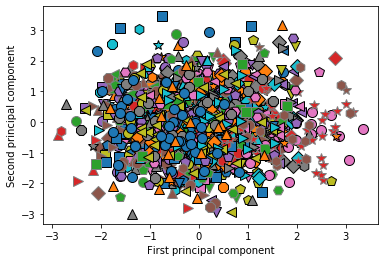

In [40]:
mglearn.discrete_scatter(X_train_pca[:,0],X_train_pca[:,1],y_train)
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

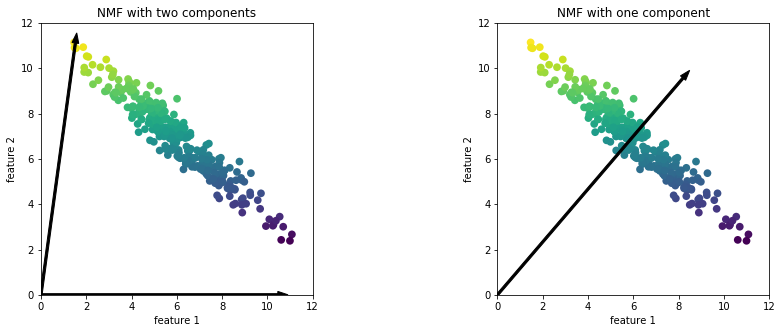

In [41]:
mglearn.plots.plot_nmf_illustration()

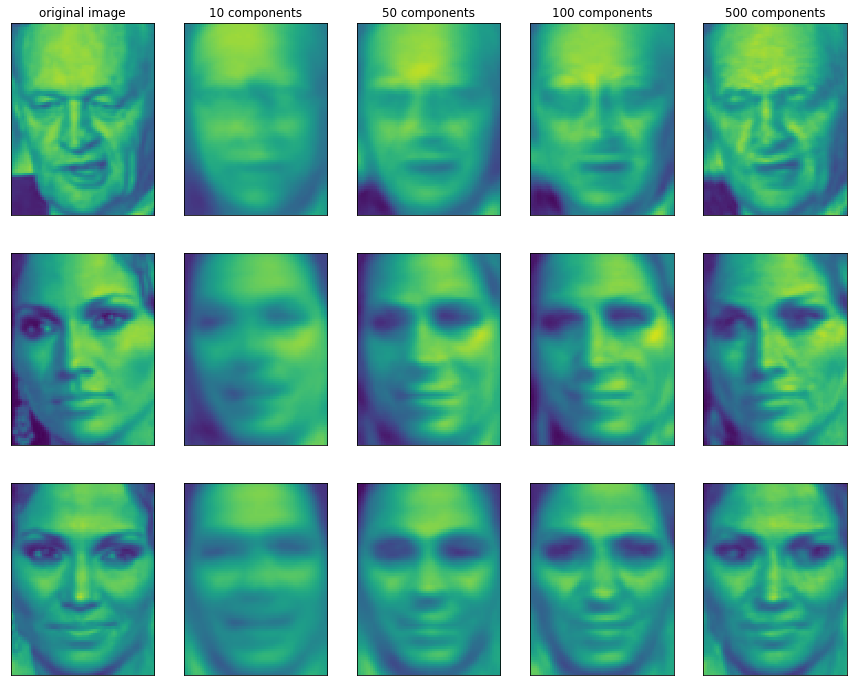

In [42]:
mglearn.plots.plot_nmf_faces(X_train,X_test,image_shape)

In [43]:
from sklearn.decomposition import NMF

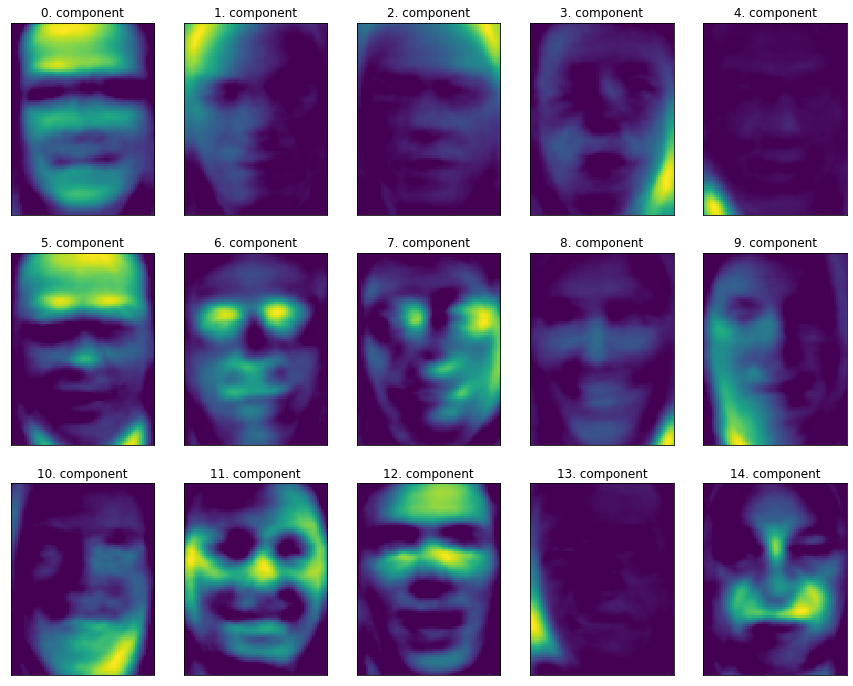

In [44]:
nmf = NMF(n_components=15,random_state=0)
nmf.fit(X_train)
X_train_nmf = nmf.transform(X_train)
X_test_nmf = nmf.transform(X_test)

fix,axes = plt.subplots(3,5,figsize=(15,12),
                       subplot_kw={'xticks':(),'yticks':()})
for i,(component,ax) in enumerate(zip(nmf.components_,axes.ravel())):
    ax.imshow(component.reshape(image_shape))
    ax.set_title("{}. component".format(i))

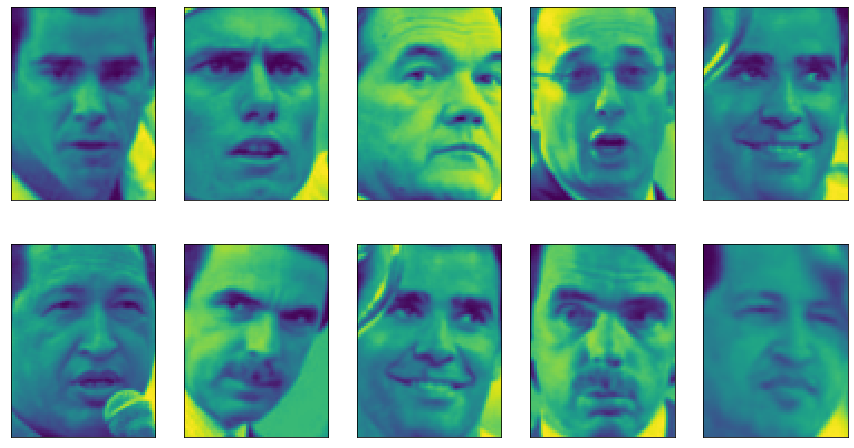

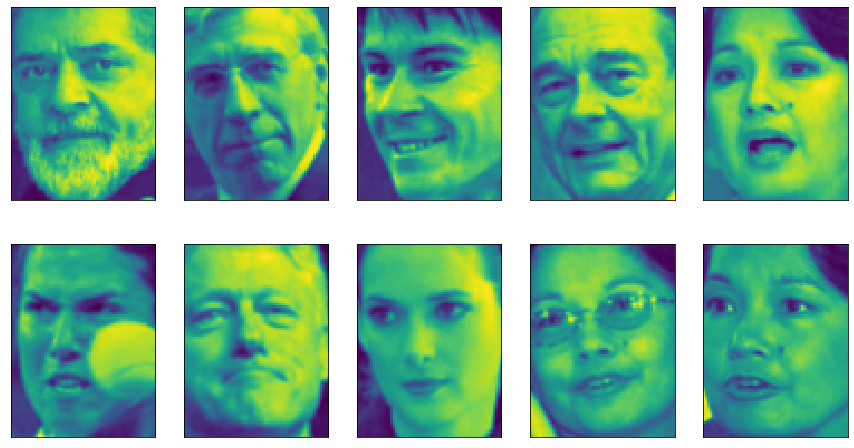

In [45]:
compn = 3
#按第3个分量排序，绘制前10张图象
inds = np.argsort(X_train_nmf[:,compn])[::-1]
fig,axes = plt.subplots(2,5,figsize=(15,8),
                       subplot_kw={'xticks':(),'yticks':()})
for i,(ind,ax) in enumerate(zip(inds,axes.ravel())):
    ax.imshow(X_train[ind].reshape(image_shape))
    
compn = 7
#按第7个分量排序，绘制前10张图象
inds = np.argsort(X_train_nmf[:,compn])[::-1]
fig,axes = plt.subplots(2,5,figsize=(15,8),
                       subplot_kw={'xticks':(),'yticks':()})
for i,(ind,ax) in enumerate(zip(inds,axes.ravel())):
    ax.imshow(X_train[ind].reshape(image_shape))

Text(0, 0.5, 'Signal')

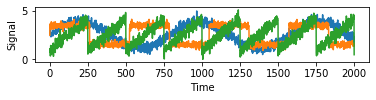

In [46]:
S = mglearn.datasets.make_signals()
plt.figure(figsize=(6,1))
plt.plot(S,'-')
plt.xlabel("Time")
plt.ylabel("Signal")

In [47]:
#将数据混合成100维的状态
A = np.random.RandomState(0).uniform(size=(100,3))
X = np.dot(S,A.T)
X.shape

(2000, 100)

In [48]:
nmf = NMF(n_components=3,random_state=42)
S_ = nmf.fit_transform(X)
S_.shape

(2000, 3)

In [49]:
pca = PCA(n_components=3)
H = pca.fit_transform(X)

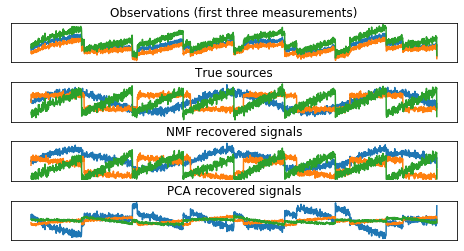

In [50]:
models = [X,S,S_,H]
names = ['Observations (first three measurements)',
        'True sources',
        'NMF recovered signals',
        'PCA recovered signals']
fig,axes = plt.subplots(4,figsize=(8,4),gridspec_kw={'hspace':.5},
                       subplot_kw={'xticks':(),'yticks':()})

for model,name,ax in zip(models,names,axes):
    ax.set_title(name)
    ax.plot(model[:,:3],'-')

In [51]:
from sklearn.datasets import load_digits

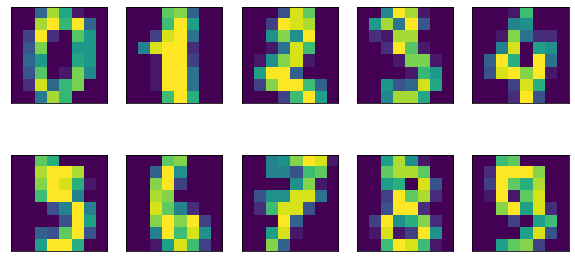

In [52]:
digits = load_digits()

fig,axes = plt.subplots(2,5,figsize=(10,5),
                       subplot_kw={'xticks':(),'yticks':()})
for ax,img in zip(axes.ravel(),digits.images):
    ax.imshow(img)

Text(0, 0.5, 'Second principal component')

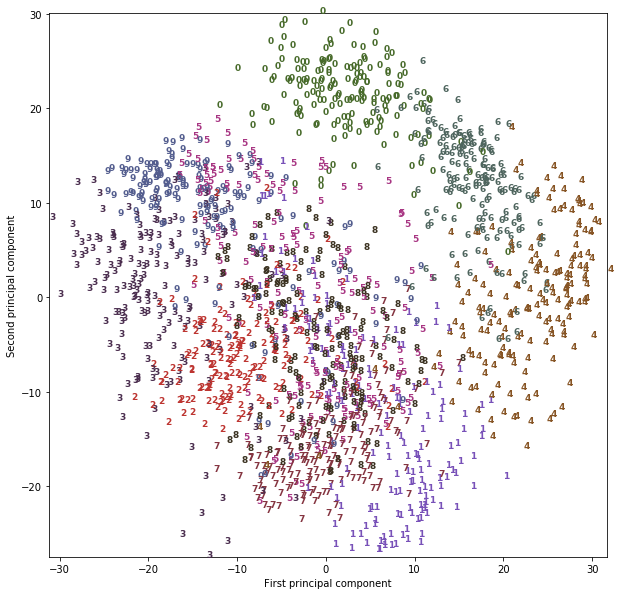

In [54]:
pca = PCA(n_components=2)
pca.fit(digits.data)
digits_pca = pca.transform(digits.data)
colors = ['#476A2A','#7851B8','#BD3430','#4A2D4E','#875525','#A83683','#4E655E','#853541','#3A3120','#535D8E']
plt.figure(figsize=(10,10))
plt.xlim(digits_pca[:,0].min(),digits_pca[:,0].max())
plt.ylim(digits_pca[:,1].min(),digits_pca[:,1].max())
for i in range(len(digits.data)):
    #将数据实际绘制成文本，而不是散点
    plt.text(digits_pca[i,0],digits_pca[i,1],str(digits.target[i]),
            color=colors[digits.target[i]],
            fontdict={'weight':'bold','size':9})
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

In [57]:
from sklearn.manifold import TSNE

In [58]:
tsne = TSNE(random_state=42)
#TSNE没有transform方法
digits_tsne = tsne.fit_transform(digits.data)

Text(0, 0.5, 't-SNE feature 1')

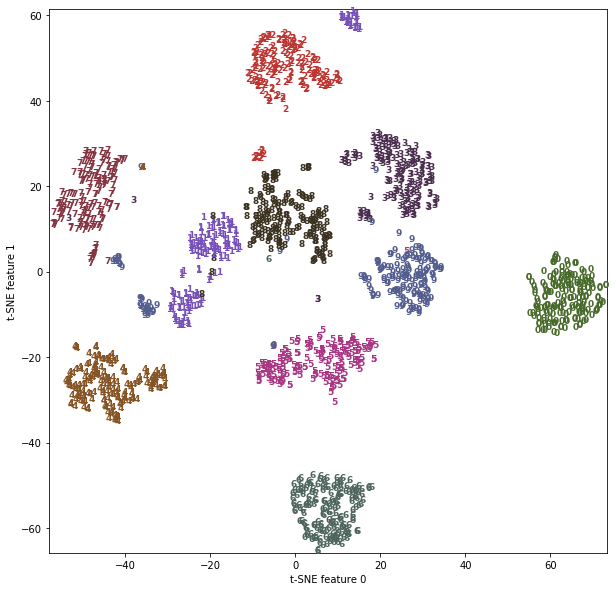

In [62]:
plt.figure(figsize=(10,10))
plt.xlim(digits_tsne[:,0].min(),digits_tsne[:,0].max() + 1)
plt.ylim(digits_tsne[:,1].min(),digits_tsne[:,1].max() + 1)
for i in range(len(digits.data)):
    #将数据实际绘制成文本，而不是散点
    plt.text(digits_tsne[i,0],digits_tsne[i,1],str(digits.target[i]),
            color=colors[digits.target[i]],
            fontdict={'weight':'bold','size':9})
plt.xlabel("t-SNE feature 0")
plt.ylabel("t-SNE feature 1")

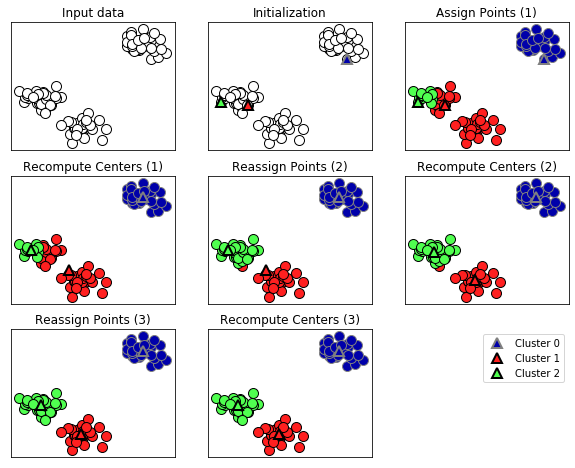

In [63]:
mglearn.plots.plot_kmeans_algorithm()

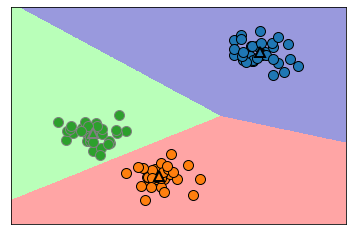

In [64]:
mglearn.plots.plot_kmeans_boundaries()

In [65]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

In [66]:
X,y = make_blobs(random_state=1)

kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [67]:
kmeans.labels_

array([1, 2, 2, 2, 0, 0, 0, 2, 1, 1, 2, 2, 0, 1, 0, 0, 0, 1, 2, 2, 0, 2,
       0, 1, 2, 0, 0, 1, 1, 0, 1, 1, 0, 1, 2, 0, 2, 2, 2, 0, 0, 2, 1, 2,
       2, 0, 1, 1, 1, 1, 2, 0, 0, 0, 1, 0, 2, 2, 1, 1, 2, 0, 0, 2, 2, 0,
       1, 0, 1, 2, 2, 2, 0, 1, 1, 2, 0, 0, 1, 2, 1, 2, 2, 0, 1, 1, 1, 1,
       2, 1, 0, 1, 1, 2, 2, 0, 0, 1, 0, 1])

In [68]:
kmeans.predict(X)

array([1, 2, 2, 2, 0, 0, 0, 2, 1, 1, 2, 2, 0, 1, 0, 0, 0, 1, 2, 2, 0, 2,
       0, 1, 2, 0, 0, 1, 1, 0, 1, 1, 0, 1, 2, 0, 2, 2, 2, 0, 0, 2, 1, 2,
       2, 0, 1, 1, 1, 1, 2, 0, 0, 0, 1, 0, 2, 2, 1, 1, 2, 0, 0, 2, 2, 0,
       1, 0, 1, 2, 2, 2, 0, 1, 1, 2, 0, 0, 1, 2, 1, 2, 2, 0, 1, 1, 1, 1,
       2, 1, 0, 1, 1, 2, 2, 0, 0, 1, 0, 1])

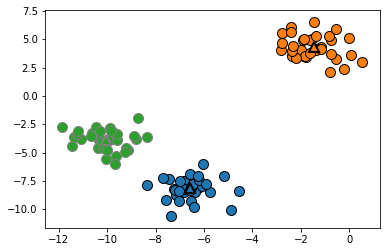

In [70]:
mglearn.discrete_scatter(X[:,0],X[:,1],kmeans.labels_,markers='o')
mglearn.discrete_scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],[0,1,2],
                        markers='^',markeredgewidth=2);

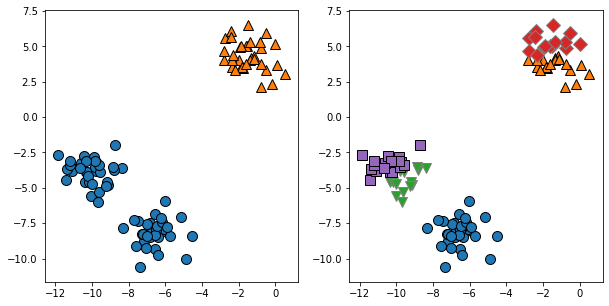

In [72]:
fig,axes = plt.subplots(1,2,figsize=(10,5))

#使用2个簇中心
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
assignments = kmeans.labels_
mglearn.discrete_scatter(X[:,0],X[:,1],assignments,ax=axes[0])

#使用5个簇中心
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
assignments = kmeans.labels_
mglearn.discrete_scatter(X[:,0],X[:,1],assignments,ax=axes[1]);

Text(0, 0.5, 'Feature 1')

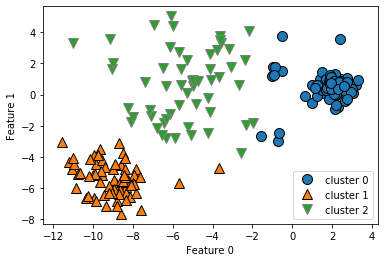

In [73]:
X_varied,y_varied = make_blobs(n_samples=200,
                              cluster_std=[1.0,2.5,0.5],
                              random_state=170)
y_pred = KMeans(n_clusters=3,random_state=0).fit_predict(X_varied)
mglearn.discrete_scatter(X_varied[:,0],X_varied[:,1],y_pred)
plt.legend(["cluster 0","cluster 1","cluster 2"],loc='best')
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Text(0, 0.5, 'Feature 1')

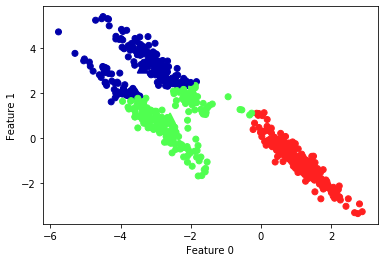

In [74]:
X,y = make_blobs(random_state=170,n_samples=600)
rng = np.random.RandomState(74)

transformation = rng.normal(size=(2,2))
X = np.dot(X,transformation)

kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_pred = kmeans.predict(X)

plt.scatter(X[:,0],X[:,1],c=y_pred,cmap=mglearn.cm3)
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],
           marker='^',c=[0,1,2],s=100,linewidth=2,cmap=mglearn.cm3)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

In [75]:
from sklearn.datasets import make_moons

Text(0, 0.5, 'Feature 1')

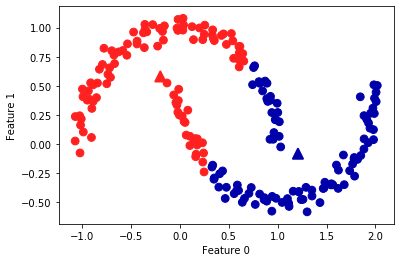

In [76]:
X,y = make_moons(n_samples=200,noise=.05,random_state=0)

kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_pred = kmeans.predict(X)

plt.scatter(X[:,0],X[:,1],c=y_pred,cmap=mglearn.cm2,s=60)
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],marker='^',c=[mglearn.cm2(0),mglearn.cm2(1)],s=100,linewidth=2)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

In [77]:
X_train,X_test,y_train,y_test = train_test_split(X_people,y_people,stratify=y_people,random_state=0)
nmf = NMF(n_components=100,random_state=0)
nmf.fit(X_train)

pca = PCA(n_components=100,random_state=0)
pca.fit(X_train)

kmeans = KMeans(n_clusters=100,random_state=0)
kmeans.fit(X_train)

X_reconstructed_pca = pca.inverse_transform(pca.transform(X_test))
X_reconstructed_kmeans = kmeans.cluster_centers_[kmeans.predict(X_test)]
X_reconstructed_nmf = np.dot(nmf.transform(X_test),nmf.components_)

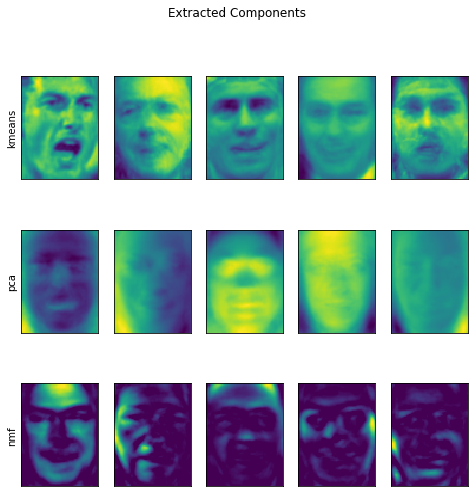

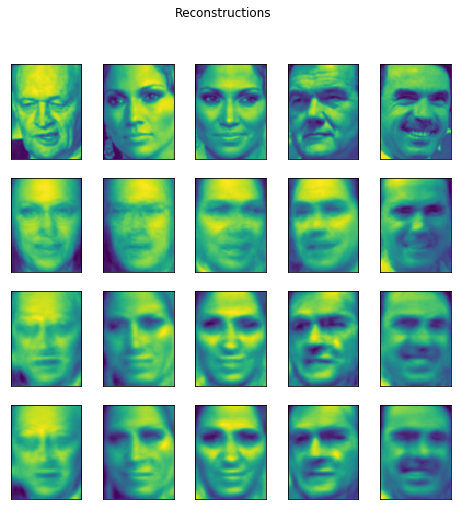

In [78]:
fig,axes = plt.subplots(3,5,figsize=(8,8),subplot_kw={'xticks':(),'yticks':()})

fig.suptitle("Extracted Components")
for ax,comp_kmeans,comp_pca,comp_nmf in zip(axes.T,kmeans.cluster_centers_,pca.components_,nmf.components_):
    ax[0].imshow(comp_kmeans.reshape(image_shape))
    ax[1].imshow(comp_pca.reshape(image_shape),cmap='viridis')    
    ax[2].imshow(comp_nmf.reshape(image_shape))    
    
axes[0,0].set_ylabel('kmeans')
axes[1,0].set_ylabel('pca')
axes[2,0].set_ylabel('nmf')

fig,axes = plt.subplots(4,5,figsize=(8,8),subplot_kw={'xticks':(),'yticks':()})

fig.suptitle("Reconstructions")
for ax,orig,rec_kmeans,rec_pca,rec_nmf in zip(axes.T,X_test,X_reconstructed_kmeans,X_reconstructed_pca,X_reconstructed_nmf):
    ax[0].imshow(orig.reshape(image_shape))
    ax[1].imshow(rec_kmeans.reshape(image_shape),cmap='viridis')    
    ax[2].imshow(rec_pca.reshape(image_shape))
    ax[3].imshow(rec_nmf.reshape(image_shape))     

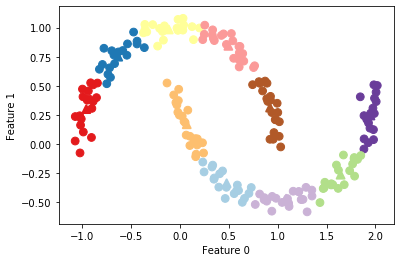

In [81]:
X,y = make_moons(n_samples=200,noise=.05,random_state=0)

kmeans = KMeans(n_clusters=10,random_state=0)
kmeans.fit(X)
y_pred = kmeans.predict(X)

plt.scatter(X[:,0],X[:,1],c=y_pred,s=60,cmap='Paired')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=60,
           marker='^',c=range(kmeans.n_clusters),linewidth=2,cmap='Paired')
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
y_pred;

In [82]:
distance_features = kmeans.transform(X)
print(distance_features.shape)
print(distance_features)

(200, 10)
[[0.9220768  1.46553151 1.13956805 ... 1.16559918 1.03852189 0.23340263]
 [1.14159679 2.51721597 0.1199124  ... 0.70700803 2.20414144 0.98271691]
 [0.78786246 0.77354687 1.74914157 ... 1.97061341 0.71561277 0.94399739]
 ...
 [0.44639122 1.10631579 1.48991975 ... 1.79125448 1.03195812 0.81205971]
 [1.38951924 0.79790385 1.98056306 ... 1.97788956 0.23892095 1.05774337]
 [1.14920754 2.4536383  0.04506731 ... 0.57163262 2.11331394 0.88166689]]


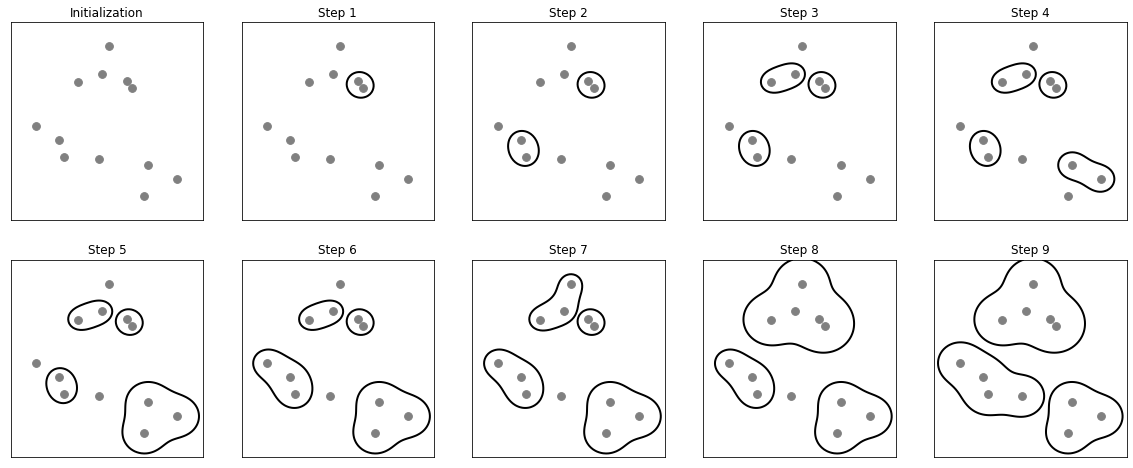

In [83]:
mglearn.plots.plot_agglomerative_algorithm()

In [84]:
from sklearn.cluster import AgglomerativeClustering

Text(0, 0.5, 'Feature 1')

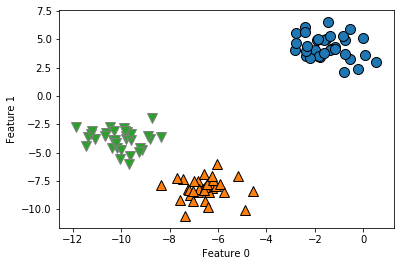

In [85]:
X,y = make_blobs(random_state=1)

agg = AgglomerativeClustering(n_clusters=3)
assignment = agg.fit_predict(X)

mglearn.discrete_scatter(X[:,0],X[:,1],assignment)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

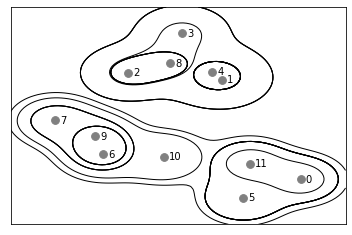

In [86]:
mglearn.plots.plot_agglomerative()

In [87]:
#从scipy中导入dendrogram函数和ward聚类函数
from scipy.cluster.hierarchy import dendrogram,ward

Text(0, 0.5, 'Cluster distance')

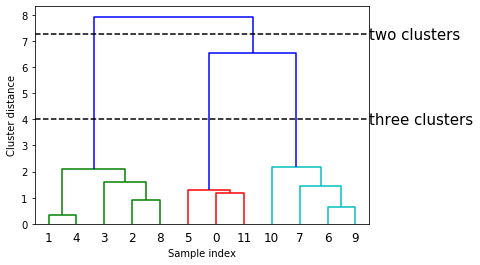

In [88]:
X,y = make_blobs(random_state=0,n_samples=12)
#将ward聚类应用于数据数组X
#SciPy的ward函数返回一个数组，指定执行凝聚聚类时跨越的距离
linkage_array = ward(X)
#现在为包含簇之间距离的linkage_array绘制树状图
dendrogram(linkage_array)

#在树中标记划分成两个簇或三个簇的位置
ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds,[7.25,7.25],'--',c='k')
ax.plot(bounds,[4,4],'--',c='k')

ax.text(bounds[1],7.25,'two clusters',va='center',fontdict={'size':15})
ax.text(bounds[1],4,'three clusters',va='center',fontdict={'size':15})
plt.xlabel("Sample index")
plt.ylabel("Cluster distance")

In [89]:
from sklearn.cluster import DBSCAN

In [90]:
X,y = make_blobs(random_state=0,n_samples=12)

dbscan = DBSCAN()
clusters = dbscan.fit_predict(X)
print(clusters)

[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


min_samples: 2 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 2 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 2 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 2 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 3 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 3 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 3 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 3 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 5 eps: 1.000000  cluster: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
min_samples: 5 eps: 1.500000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 2.000000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]


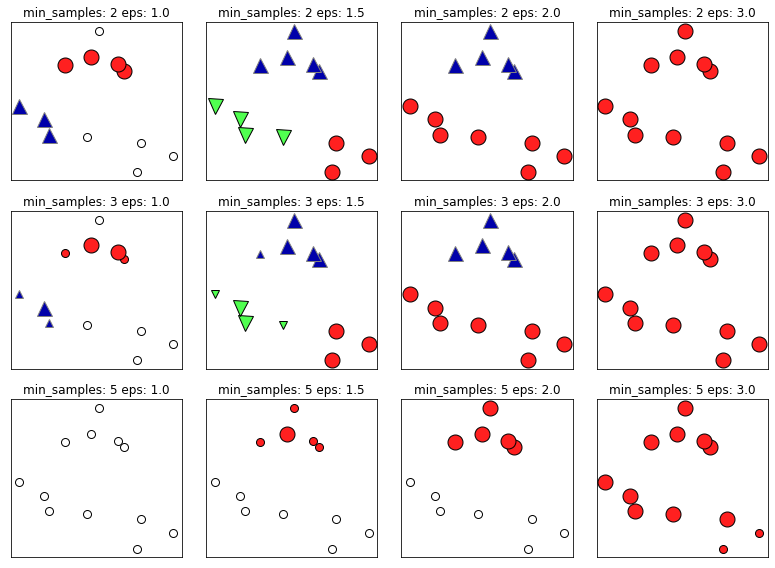

In [92]:
mglearn.plots.plot_dbscan()

Text(0, 0.5, 'Feature 1')

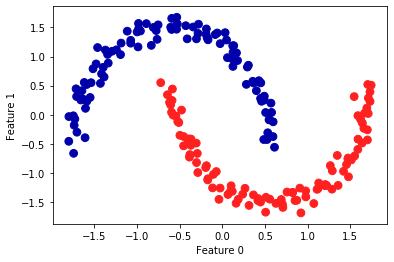

In [93]:
X,y = make_moons(n_samples=200,noise=.05,random_state=0)

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

dbscan = DBSCAN()
clusters = dbscan.fit_predict(X_scaled)
plt.scatter(X_scaled[:,0],X_scaled[:,1],c=clusters,cmap=mglearn.cm2,s=60)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

In [94]:
from sklearn.metrics.cluster import adjusted_rand_score

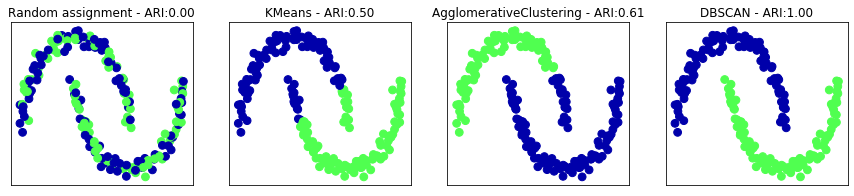

In [98]:
X,y = make_moons(n_samples=200,noise=.05,random_state=0)

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

fig,axes = plt.subplots(1,4,figsize=(15,3),
                       subplot_kw={'xticks':(),'yticks':()})

algorithms = [KMeans(n_clusters=2),AgglomerativeClustering(n_clusters=2),DBSCAN()]

#创建一个随机的簇分配，作为参考
random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0,high=2,size=len(X))

#绘制随机分配
axes[0].scatter(X_scaled[:,0],X_scaled[:,1],c=random_clusters,
               cmap=mglearn.cm3,s=60)
axes[0].set_title("Random assignment - ARI:{:.2f}".format(adjusted_rand_score(y,random_clusters)))

for ax,algorithm in zip(axes[1:],algorithms):
    clusters = algorithm.fit_predict(X_scaled)
    ax.scatter(X_scaled[:,0],X_scaled[:,1],c = clusters,cmap=mglearn.cm3,s=60)
    ax.set_title("{} - ARI:{:.2f}".format(algorithm.__class__.__name__,adjusted_rand_score(y,clusters)))

In [99]:
from sklearn.metrics import accuracy_score

In [101]:
#这两种点标签对应相同的聚类
cluster1 = [0,0,1,1,0]
cluster2 = [1,1,0,0,1]
#标签完全不同
print(accuracy_score(cluster1,cluster2))
#聚类完全相同
print(adjusted_rand_score(cluster1,cluster2))

0.0
1.0
